In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import NearMiss
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.e

In [2]:
data=pd.read_csv("train_ctrUa4K.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [5]:
data['Loan_Amount_Term'].value_counts()

360    512
180     44
480     15
300     13
84       4
240      4
120      3
36       2
60       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [6]:
data['Credit_History'].value_counts()

1    475
0     89
Name: Credit_History, dtype: int64

In [7]:
#data['Dependents']=data.Dependents.map({'0':'zero','1':'one','2':'two','3+':'three_or_more'})
data.astype({'Dependents': 'object','Loan_Amount_Term': 'object','Credit_History': 'str'}).dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#data['Loan_Amount_Term']=data.Loan_Amount_Term.map({12:'one',36:'three',60:'five',84:'seven',120:'ten',180:'fifteen',240:'twenty',300:'twentyfive',360:'thirty',480:'forty'})

In [9]:
#data['Credit_History']=data.Credit_History.map({0:'zero',1:'one'})

In [10]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614,592,600,564,614,614
unique,614,2,2,4,2,2,nan,nan,nan,nan,nan,3,2
top,LP002366,Male,Yes,0,Graduate,No,nan,nan,nan,nan,nan,Semiurban,Y
freq,1,489,398,345,480,500,nan,nan,nan,nan,nan,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,"5,403","1,621",146,342,1,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,"6,109","2,926",86,65,0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150,0,9,12,0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,"2,878",0,100,360,1,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,"3,812","1,188",128,360,1,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,"5,795","2,297",168,360,1,NaN,NaN


In [110]:
profile= ProfileReport(data,title='Report',explorative=True)

In [111]:
profile.to_widgets()

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    object 
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 62.5+ KB


In [113]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1,-0,1
CoapplicantIncome,-0,1,0
LoanAmount,1,0,1


In [99]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,zero,Graduate,No,5849,0,nan,thirty,one,Urban,Y
1,LP001003,Male,Yes,one,Graduate,No,4583,"1,508",128,thirty,one,Rural,N
2,LP001005,Male,Yes,zero,Graduate,Yes,3000,0,66,thirty,one,Urban,Y
3,LP001006,Male,Yes,zero,Not Graduate,No,2583,"2,358",120,thirty,one,Urban,Y
4,LP001008,Male,No,zero,Graduate,No,6000,0,141,thirty,one,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,zero,Graduate,No,2900,0,71,thirty,one,Rural,Y
610,LP002979,Male,Yes,three_or_more,Graduate,No,4106,0,40,fifteen,one,Rural,Y
611,LP002983,Male,Yes,one,Graduate,No,8072,240,253,thirty,one,Urban,Y
612,LP002984,Male,Yes,two,Graduate,No,7583,0,187,thirty,one,Urban,Y


In [11]:
for column in ('Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term','Property_Area','Education'):
    data[column].fillna(data[column].mode()[0],inplace=True)

In [12]:
for column in ('LoanAmount','CoapplicantIncome','ApplicantIncome'):
    data[column].fillna(data[column].mean(),inplace=True)

In [13]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
profile= ProfileReport(data,title='Report',explorative=True)
profile.to_widgets()

In [14]:
data['Education'] = data['Education'].str.replace(' ','_')

In [ ]:
('Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term','Property_Area','Education')

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender']= le.fit_transform(data['Gender'].astype(str)) 
data['Married']= le.fit_transform(data['Married'].astype(str)) 
data['Dependents']= le.fit_transform(data['Dependents'].astype(str)) 
data['Self_Employed']= le.fit_transform(data['Self_Employed'].astype(str)) 
data['Education']= le.fit_transform(data['Education'].astype(str)) 
data['Property_Area']= le.fit_transform(data['Property_Area'].astype(str)) 

In [16]:
data['Loan_Status']=data.Loan_Status.map({'Y':0,'N':1})
Y=data['Loan_Status'].values
data.drop(['Loan_Status'],axis=1,inplace=True)
X=data[data.iloc[:,1:23].columns]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

In [18]:
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
print("="*50,"Gender","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Gender'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Gender_ohe = vectorizer.transform(X_train['Gender'].values)
X_test_Gender_ohe = vectorizer.transform(X_test['Gender'].values)

print("After vectorizations")
print(X_train_Gender_ohe.shape, y_train.shape)
print(X_test_Gender_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Married","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Married'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Married_ohe = vectorizer.transform(X_train['Married'].values)
X_test_Married_ohe = vectorizer.transform(X_test['Married'].values)

print("After vectorizations")
print(X_train_Married_ohe.shape, y_train.shape)
print(X_test_Married_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Dependents","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Dependents'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Dependents_ohe = vectorizer.transform(X_train['Dependents'].values)
X_test_Dependents_ohe = vectorizer.transform(X_test['Dependents'].values)

print("After vectorizations")
print(X_train_Dependents_ohe.shape, y_train.shape)
print(X_test_Dependents_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


print("="*50,"Education","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Education'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Education_ohe = vectorizer.transform(X_train['Education'].values)
X_test_Education_ohe = vectorizer.transform(X_test['Education'].values)

print("After vectorizations")
print(X_train_Education_ohe.shape, y_train.shape)
print(X_test_Education_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


print("="*50,"Self_Employed","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Self_Employed'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Self_Employed_ohe = vectorizer.transform(X_train['Self_Employed'].values)
X_test_Self_Employed_ohe = vectorizer.transform(X_test['Self_Employed'].values)

print("After vectorizations")
print(X_train_Self_Employed_ohe.shape, y_train.shape)
print(X_test_Self_Employed_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Property_Area","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Property_Area'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Property_Area_ohe = vectorizer.transform(X_train['Property_Area'].values)
X_test_Property_Area_ohe = vectorizer.transform(X_test['Property_Area'].values)

print("After vectorizations")
print(X_train_Property_Area_ohe.shape, y_train.shape)
print(X_test_Property_Area_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Loan_Amount_Term","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Loan_Amount_Term'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Loan_Amount_Term_ohe = vectorizer.transform(X_train['Loan_Amount_Term'].values)
X_test_Loan_Amount_Term_ohe = vectorizer.transform(X_test['Loan_Amount_Term'].values)

print("After vectorizations")
print(X_train_Loan_Amount_Term_ohe.shape, y_train.shape)
print(X_test_Loan_Amount_Term_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Credit_History","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Credit_History'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Credit_History_ohe = vectorizer.transform(X_train['Credit_History'].values)
X_test_Credit_History_ohe = vectorizer.transform(X_test['Credit_History'].values)

print("After vectorizations")
print(X_train_Credit_History_ohe.shape, y_train.shape)
print(X_test_Credit_History_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


================================================== Gender ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['female', 'male']

================================================== Married ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['no', 'yes']

================================================== Dependents ==================================================
After vectorizations
(411, 4) (411,)
(203, 4) (203,)
['one', 'three_or_more', 'two', 'zero']

================================================== Education ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['graduate', 'not_graduate']

================================================== Self_Employed ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['no', 'yes']

================================================== Pro

In [54]:
from sklearn.preprocessing import Normalizer
print("="*50,"LoanAmount","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['LoanAmount'].values.reshape(1,-1))

X_train_LoanAmount_norm = normalizer.transform(X_train['LoanAmount'].values.reshape(1,-1))
X_test_LoanAmount_norm = normalizer.transform(X_test['LoanAmount'].values.reshape(1,-1))

X_train_LoanAmount_norm = X_train_LoanAmount_norm.reshape(-1,1)
X_test_LoanAmount_norm = X_test_LoanAmount_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_LoanAmount_norm.shape, y_train.shape)
print(X_test_LoanAmount_norm.shape, y_test.shape)
print()

print("="*50,"ApplicantIncome","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['ApplicantIncome'].values.reshape(1,-1))

X_train_ApplicantIncome_norm = normalizer.transform(X_train['ApplicantIncome'].values.reshape(1,-1))
X_test_ApplicantIncome_norm = normalizer.transform(X_test['ApplicantIncome'].values.reshape(1,-1))

X_train_ApplicantIncome_norm = X_train_ApplicantIncome_norm.reshape(-1,1)
X_test_ApplicantIncome_norm = X_test_ApplicantIncome_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_ApplicantIncome_norm.shape, y_train.shape)
print(X_test_ApplicantIncome_norm.shape, y_test.shape)
print()

print("="*50,"CoapplicantIncome","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['CoapplicantIncome'].values.reshape(1,-1))

X_train_CoapplicantIncome_norm = normalizer.transform(X_train['CoapplicantIncome'].values.reshape(1,-1))
X_test_CoapplicantIncome_norm = normalizer.transform(X_test['CoapplicantIncome'].values.reshape(1,-1))

X_train_CoapplicantIncome_norm = X_train_CoapplicantIncome_norm.reshape(-1,1)
X_test_CoapplicantIncome_norm = X_test_CoapplicantIncome_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_CoapplicantIncome_norm.shape, y_train.shape)
print(X_test_CoapplicantIncome_norm.shape, y_test.shape)

================================================== LoanAmount ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)

================================================== ApplicantIncome ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)

================================================== CoapplicantIncome ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)


In [55]:
from scipy.sparse import hstack
X_tr = hstack((X_train_Gender_ohe, X_train_Married_ohe, X_train_Dependents_ohe,X_train_Education_ohe,X_train_Self_Employed_ohe,X_train_Property_Area_ohe,X_train_Loan_Amount_Term_ohe,X_train_Credit_History_ohe,X_train_LoanAmount_norm,X_train_ApplicantIncome_norm,X_train_CoapplicantIncome_norm)).tocsr()
X_te = hstack((X_test_Gender_ohe, X_test_Married_ohe, X_test_Dependents_ohe,X_test_Education_ohe,X_test_Self_Employed_ohe,X_test_Property_Area_ohe,X_test_Loan_Amount_Term_ohe,X_test_Credit_History_ohe,X_test_LoanAmount_norm,X_test_ApplicantIncome_norm,X_test_CoapplicantIncome_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*125)

Final Data matrix
(411, 30) (411,)
(203, 30) (203,)


In [19]:
#StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [20]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
classifier = GridSearchCV(LogisticRegression(), param_grid,cv=10,scoring='roc_auc',return_train_score=True)
classifier.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

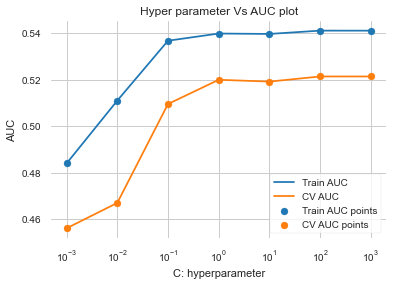

In [61]:
results_tf = pd.DataFrame.from_dict(classifier.cv_results_)
results_tf = results_tf.sort_values(['param_C'])
train_auc= results_tf['mean_train_score']
train_auc_std= results_tf['std_train_score']
cv_auc = results_tf['mean_test_score'] 
cv_auc_std= results_tf['std_test_score']
A =  results_tf['param_C']
plt.plot(A, train_auc, label='Train AUC')


plt.plot(A, cv_auc, label='CV AUC')

plt.scatter(A, train_auc, label='Train AUC points')
plt.scatter(A, cv_auc, label='CV AUC points')
plt.xscale('log')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [21]:
best_param=classifier.best_params_
print("Best Hyperparameter: ",best_param)
p_C=best_param['C']

Best Hyperparameter:  {'C': 0.01}


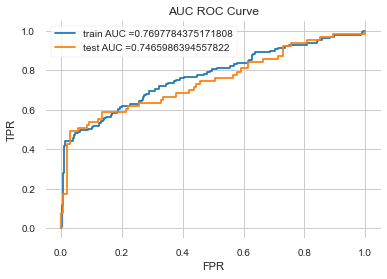

In [23]:
from sklearn.metrics import roc_curve, auc


DT = LogisticRegression(C=p_C)
DT.fit(scaled_X_train, y_train)


y_train_pred = DT.predict_proba(scaled_X_train)    
y_test_pred = DT.predict_proba(scaled_X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [24]:
#Computing AUC_Score with best parameter
AUC_Score_test_LOG=metrics.roc_auc_score(y_test,y_test_pred[:,1])
print('AUC_Score on test data: ',AUC_Score_test_LOG)
AUC_Score_train_LOG=metrics.roc_auc_score(y_train,y_train_pred[:,1])
print('AUC_Score on train data: ',AUC_Score_train_LOG)

AUC_Score on test data:  0.7465986394557822
AUC_Score on train data:  0.7697784375171808


In [65]:
def find_best_threshold(thresholdl, fpr, tpr):
    t = thresholdl[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [67]:
print("="*50,"Confusion Matrix","="*50)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred[:,1], best_t)))
cnf_train=confusion_matrix(y_train, predict_with_best_t(y_train_pred[:,1], best_t))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred[:,1], best_t)))
cnf_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred[:,1], best_t))

================================================== Confusion Matrix ==================================================
the maximum value of tpr*(1-fpr) 0.5087415470888998 for threshold 0.285
Train confusion matrix
[[199  83]
 [ 36  93]]
Test confusion matrix
[[91 49]
 [20 43]]


In [26]:
#y_test_predict=predict_with_best_t(y_test_pred[:,1], best_t)
y_test_predict=DT.predict(scaled_X_test)

In [27]:
print("Recall for logistic regression model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for logistic regression model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for logistic regression model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for logistic regression model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for logistic regression model:",metrics.log_loss(y_test,y_test_predict))

Recall for logistic regression model: 0.42857142857142855
Precision for logistic regression model: 0.9
Accuracy for logistic regression model: 0.8078817733990148
F-score for logistic regression model: 0.5806451612903225
Log-loss for logistic regression model: 6.635540286669002


In [28]:
importance = DT.coef_[0]
importance

array([-0.008803  , -0.0733174 , -0.01069342,  0.08569775, -0.00556581,
       -0.00295497,  0.08664309,  0.02193328, -0.00830428, -0.52748689,
       -0.05158717])

In [48]:
from prettytable import PrettyTable
def important_features(clf):
    class_labels = clf.classes_
    t1 = PrettyTable(['SNo','Coefficient','Feature Name'])
    #t2 = PrettyTable(['SNo','Class Label','Coefficient','Feature Name'])
    c0=0
    feature_names =X_train.columns
    top20_class0 = sorted(zip(clf.coef_[0], feature_names),reverse=True)
    #top20_class1 = sorted(zip(clf.coef_[1], feature_names),reverse=True)[:20]
    for coef, feature in top20_class0:
        if(coef>0):
            c0+=1
            t1.add_row([c0,coef,feature])
    #for coef, feature in top20_class1:
   #     c1+=1
    #    t2.add_row([c1,class_labels[1],coef,feature])
    print("Important features")
    print(t1)
    print("="*100)
    #print("Important words in positive cases")
    #print(t2)
important_features(DT)

Important features
+-----+---------------------+-------------------+
| SNo |     Coefficient     |    Feature Name   |
+-----+---------------------+-------------------+
|  1  | 0.08664308692060592 | CoapplicantIncome |
|  2  | 0.08569774953914466 |     Education     |
|  3  | 0.02193328194645184 |     LoanAmount    |
+-----+---------------------+-------------------+


In [57]:
X_tr_features_to_keep=X_train[['CoapplicantIncome','Education','LoanAmount']]
X_te_features_to_keep=X_test[['CoapplicantIncome','Education','LoanAmount']]

In [58]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
classifier = GridSearchCV(LogisticRegression(), param_grid,cv=10,scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_features_to_keep, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [59]:
best_param=classifier.best_params_
print("Best Hyperparameter: ",best_param)
p_C=best_param['C']

Best Hyperparameter:  {'C': 100}


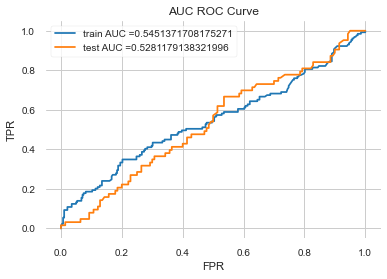

In [60]:
from sklearn.metrics import roc_curve, auc


DT = LogisticRegression(C=p_C)
DT.fit(X_tr_features_to_keep, y_train)


y_train_pred = DT.predict_proba(X_tr_features_to_keep)    
y_test_pred = DT.predict_proba(X_te_features_to_keep)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [62]:
def KNN_param(x,y,nfolds):
    n_neighbors_val=[5,10,20,30,40,50]
    KNN_model = KNeighborsClassifier()
    param_grid={'n_neighbors':n_neighbors_val}
    grid_search_KNN=GridSearchCV(estimator=KNN_model,param_grid=param_grid,cv=nfolds)
    grid_search_KNN.fit(x,y)
    return grid_search_KNN.best_params_
KNN_param(scaled_X_train,y_train,3)

{'n_neighbors': 5}

In [65]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(scaled_X_train, y_train)
KNN_pred=KNN_model.predict(scaled_X_test)
print("Recall for KNN model:",metrics.recall_score(y_test,KNN_pred))
print("Precision for KNN model:",metrics.precision_score(y_test,KNN_pred))
print("Accuracy for KNN model:",metrics.accuracy_score(y_test,KNN_pred))
print("F-score for KNN model:",metrics.f1_score(y_test,KNN_pred))
print("Log-loss for KNN model:",metrics.log_loss(y_test,KNN_pred))

Recall for KNN model: 0.4603174603174603
Precision for KNN model: 0.7837837837837838
Accuracy for KNN model: 0.7931034482758621
F-score for KNN model: 0.58
Log-loss for KNN model: 7.145985248106848


In [ ]:
def decisiontree_param(X, y, nfolds):
    min_sample_leaf_val=[1,2,3,4,5,6,7,8,9,10]
    criterion_val=['entropy','gini']
    max_depth=[1,2,3,4,5,6,7,8,9,10]
    param_grid = {'max_depth':max_depth,'criterion':criterion_val,'min_samples_leaf':min_sample_leaf_val}
    DT_model=DecisionTreeClassifier()
    grid_search_DT = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=nfolds)
    grid_search_DT.fit(X,y)
    return grid_search_DT.best_params_
decisiontree_param(scaled_X_train,y_train,5)

In [ ]:
DT_model=DecisionTreeClassifier(criterion = "entropy",max_depth=1, min_samples_leaf=1)
DT_model.fit(scaled_X_train,Y_train)
DT_pred=DT_model.predict(scaled_X_test)
print("Recall for decision tree model:",metrics.recall_score(y_test,DT_pred))
print("Precision for decision tre model:",metrics.precision_score(y_test,DT_pred))
print("Accuracy for decision tre model:",metrics.accuracy_score(y_test,DT_pred))
print("F-score for decision tre model:",metrics.f1_score(y_test,DT_pred))
print("Log-loss for decision tre model:",metrics.log_loss(y_test,DT_pred))